## Data parse

In [1]:
%matplotlib inline

from src.treebank.ellips import *
from os import path 
from sys import path as syspath

Resources = {
    file:path.abspath(path.join(syspath[0], "resources/proiel-treebank/"+file))
    for file in [
        "cic-att.xml",
        "caes-gal.xml",
        "latin-nt.xml",
        "per-aeth.xml"
    ]
}

# Data Loading
texts = {
    file:Text(
        urn="No care",
        resource=resource,
        parser=ProielParser
    ) for file, resource in Resources.items()
}

/home/thibault/dev/thesis/env/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
with open("pickles/proiel-ip.pickle", "wb") as f:
    pickle.dump(texts, f)

## Data use

/home/thibault/dev/thesis/env/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


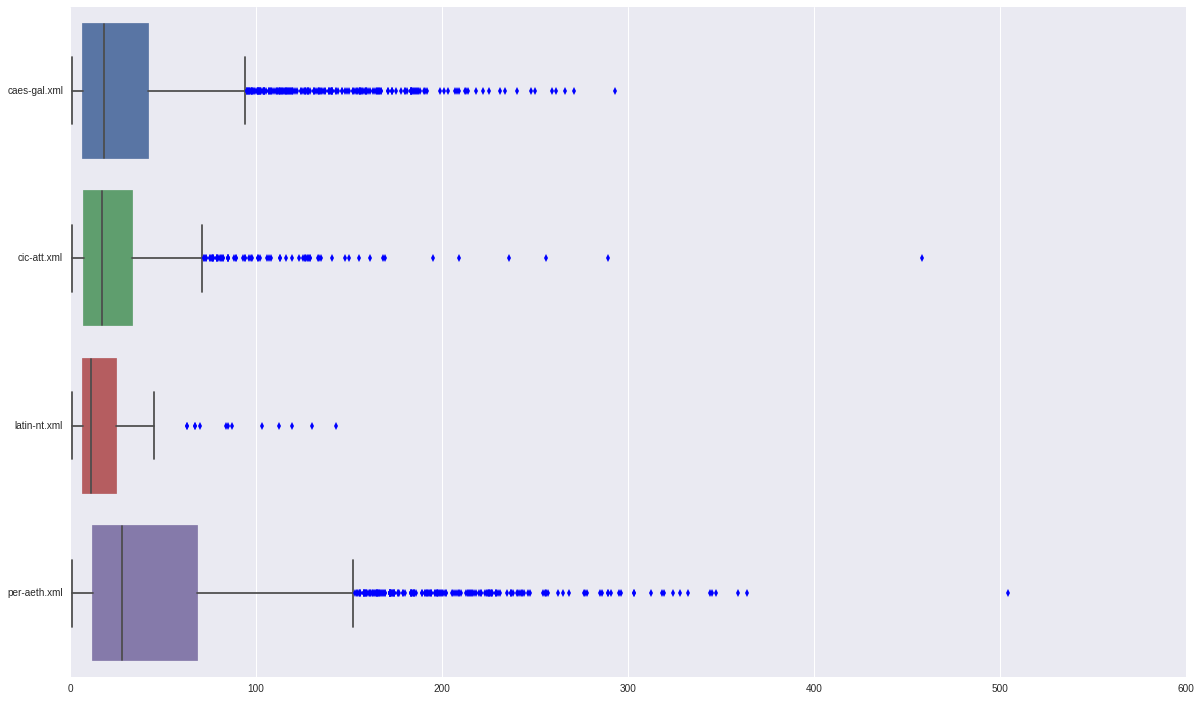

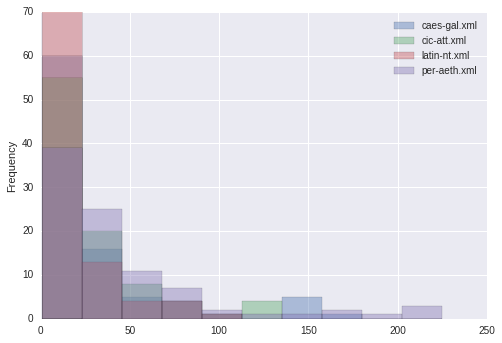

In [17]:
import pickle
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

with open("pickles/proiel-ip.pickle", "rb") as f:
    Pickle = pickle.load(f)

Distances = pd.DataFrame({
    key: pd.Series([token.recall for token in value.tokens.values() if token.recall]) for key, value in Pickle.items()
})
sns.set_context("notebook")
plt.figure(figsize=(20, 12))

ax = sns.boxplot(data=Distances, orient="h")

df = Distances[Distances.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)] 
plot = df.plot(kind='hist', alpha=0.4)